In [1]:
from importlib import reload
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan
import mnist_classifier as mc

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True
Cuda: True


In [ ]:
reload(mc)
model = mc.train()

In [ ]:
reload(mc)
reload(gan)
mc.evaluate(model, gan.get_mnist_dataloader(300, train=False))

In [ ]:
torch.save(model.state_dict(), "pretrained_mnist_classifier")

In [4]:
reload(mc)
loaded_mod = mc.load_model("pretrained_mnist_classifier").eval()

Cuda: True


In [5]:
mc.evaluate(loaded_mod, gan.get_mnist_dataloader(300, train=False))
mc.evaluate(loaded_mod, gan.get_mnist_dataloader(300, train=True))


Average loss: 0.0175, Accuracy: 9955/10000 (99.000%)


Average loss: 0.0009, Accuracy: 59980/60000 (99.000%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

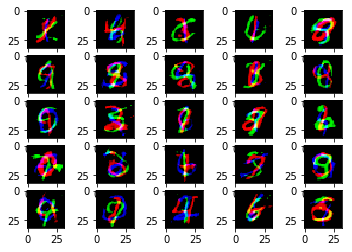

In [17]:
# load a DCGAN for stacked mnist
loaded_gen = gan.load_model("pacdcgan2_07_25").eval()

z = Variable(Tensor(np.random.normal(
                        loc=0.0,
                        scale=1.0,
                        size=(25, 100))))

gan.show(loaded_gen(z).detach())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 32, 32])
9


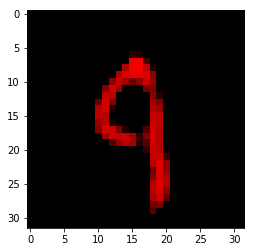

In [71]:
batch_index = 10
channel = 0

gen_output_original = loaded_gen(z).detach()
print(gen_output_original.shape)

gen_output = gen_output_original[batch_index][channel:channel + 1]
print(gen_output.shape)
print(int(torch.argmax(loaded_mod(gen_output.clone().unsqueeze_(0)))))
hack = torch.cat([gen_output, torch.zeros(1, 32, 32).cuda(), torch.zeros(1, 32, 32).cuda()])
gan.show(hack.unsqueeze_(0))